Smith ita - eng DEBUG

In [53]:
import os
import csv
import matplotlib.pyplot as plt
import pickle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Display loss

In [61]:
def plot_progress(output_folder):
    # Plot learning curve
    loss_fn = os.path.join(output_folder, 'train_mod', 'loss_output.csv')
    data_x = []
    data_y = []

    with open(loss_fn) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            data_x.append(int(row[0]))
            data_y.append(float(row[1]))


    plt.plot(data_x, data_y, c='r')
    plt.title('Learning curve')
    plt.xlabel('Epochs')
    plt.ylabel('Avg sims')
    plt.grid()
    plt.show()

    # Plot precision curves
    def append_precs(var, data):
        var[0].append(data[1][0])
        var[1].append(data[1][1])
        var[2].append(data[1][2])

    colors = ['b', 'g', 'y']
    prec_nbs = [1, 5, 10]
    prec_en_it = [[], [], []]
    prec_it_en = [[], [], []]
    prec_fn = os.path.join(output_folder, 'train_mod', 'precision_output')
    with open(prec_fn, 'rb') as picklefile:
        precs = pickle.load(picklefile)
    for i, ls in enumerate(precs):
        en_it = ls[0]
        it_en = ls[1]
        append_precs(prec_en_it, en_it)
        append_precs(prec_it_en, it_en)

    nb = len(prec_en_it)
    for i in range(nb):
        plt.plot(data_x, prec_en_it[i], c=colors[i])
        plt.title('Precision({}) en-it'.format(prec_nbs[i]))
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.grid()
        plt.show()
        plt.plot(data_x, prec_it_en[i], c=colors[i])
        plt.title('Precision({}) it-en'.format(prec_nbs[i]))
        plt.xlabel('Epochs')
        plt.ylabel('Precision')
        plt.grid()
        plt.show()

In [ ]:
nbs = [1, 50, 99]
T_fn = os.path.join(output_folder, 'train_mod', 'T_{}.pickle'.format(nbs[0]))

100 epochs, without SVD

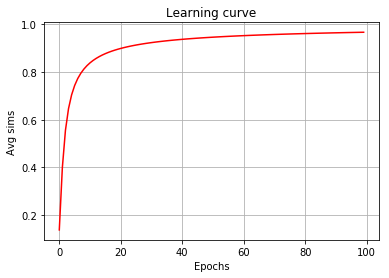

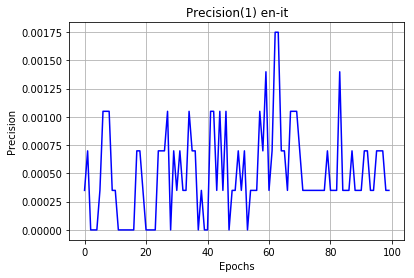

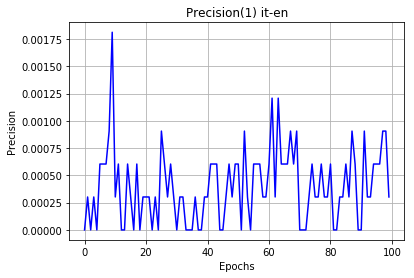

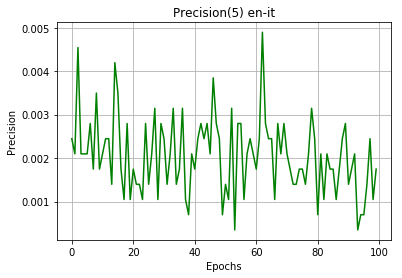

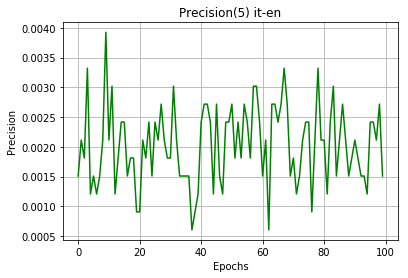

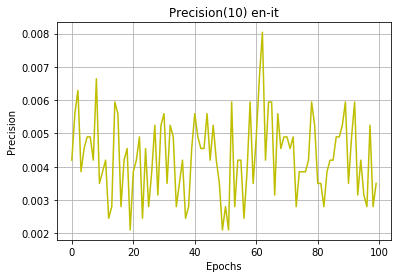

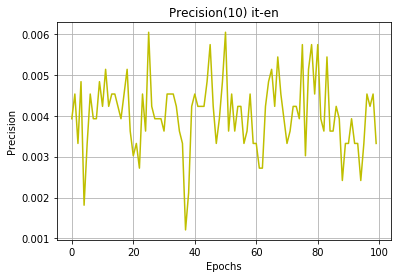

In [62]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180112_1119_21'
plot_progress(output_folder=output_folder)